In [14]:
from utils import read_envi_ascii, read_raw
import numpy as np
from sklearn.model_selection import train_test_split
from machine_learning import DecisionTree, predict

In [15]:
# Read data
data = read_envi_ascii('data/biaotu.txt')


In [16]:
huangqi = data['huangqi']
zazhi1 = data['zazhi1']
zazhi2 = data['zazhi2']
beijing = data['beijing']
gancaopian = data['gancaopian']
hongqi = data['hongqi']

In [17]:
huangqi_y = np.ones(huangqi.shape[0]) * 0
zazhi1_y = np.ones(zazhi1.shape[0]) * 1
zazhi2_y = np.ones(zazhi2.shape[0]) * 2
beijing_y = np.ones(beijing.shape[0]) * 3
gancaopian_y = np.ones(gancaopian.shape[0]) * 4
hongqi_y = np.ones(hongqi.shape[0]) * 5

In [18]:
data_x = np.concatenate((huangqi, zazhi1, zazhi2, beijing, gancaopian, hongqi), axis=0)
data_y = np.concatenate((huangqi_y, zazhi1_y, zazhi2_y, beijing_y, gancaopian_y, hongqi_y), axis=0)

In [19]:
train_x, test_x, train_y, test_y = train_test_split(data_x ,data_y, test_size=0.3, stratify=data_y)

In [20]:
file_name = 'models/dt_hebing.p'
DecisionTree(train_x, train_y,test_x, test_y, file_name)

预测时间： 0.0019943714141845703
DT训练模型评分：1.0
DT待测模型评分：0.8983572895277208
DT预测结果：[0. 4. 1. 2. 3. 5. 4. 4. 0. 0. 3. 2. 2. 4. 4. 1. 2. 3. 1. 0. 2. 5. 3. 1.
 5. 1. 3. 2. 3. 4. 1. 1. 2. 3. 3. 5. 0. 5. 5. 2. 1. 0. 0. 2. 4. 4. 5. 0.
 5. 1. 3. 5. 3. 1. 2. 0. 3. 2. 3. 5. 1. 3. 0. 5. 0. 5. 0. 2. 1. 5. 5. 3.
 0. 0. 2. 5. 3. 1. 2. 0. 4. 4. 4. 3. 1. 2. 1. 2. 0. 0. 1. 1. 1. 2. 5. 3.
 3. 3. 0. 4. 3. 3. 2. 1. 4. 1. 3. 0. 2. 2. 2. 1. 0. 0. 5. 1. 4. 0. 5. 2.
 2. 3. 5. 2. 1. 0. 3. 0. 5. 1. 3. 1. 4. 3. 4. 3. 2. 1. 0. 5. 1. 3. 4. 0.
 1. 2. 0. 1. 0. 1. 2. 1. 2. 4. 3. 5. 0. 2. 2. 4. 2. 0. 0. 3. 0. 2. 0. 4.
 4. 0. 0. 2. 1. 4. 5. 0. 1. 2. 3. 4. 4. 1. 2. 1. 2. 0. 4. 5. 5. 4. 2. 0.
 5. 0. 4. 4. 3. 3. 0. 0. 0. 0. 5. 4. 0. 1. 4. 5. 5. 3. 4. 3. 1. 2. 0. 2.
 3. 0. 5. 0. 2. 3. 4. 1. 5. 3. 2. 1. 2. 3. 5. 5. 3. 1. 5. 1. 4. 1. 1. 2.
 0. 4. 4. 4. 3. 4. 5. 0. 4. 5. 5. 1. 3. 5. 3. 3. 3. 0. 4. 2. 5. 2. 4. 0.
 2. 0. 5. 0. 0. 1. 5. 2. 2. 3. 0. 0. 3. 0. 0. 4. 4. 2. 3. 4. 2. 5. 4. 4.
 1. 4. 1. 4. 3. 3. 4. 2. 2. 2. 0. 3. 1. 2. 2. 4.

In [21]:
pic = read_raw('data/hebing.raw', shape=(692, 272, 768))

In [22]:
pic_shape0 = pic.shape[0]
pic_shape1 = pic.shape[1]
pic = pic.reshape(-1, 272)

In [23]:
pre_pic = predict(pic, file_name)

预测时间： 0.1675431728363037


In [25]:
pre_pic = pre_pic.reshape(pic_shape0, pic_shape1)

pre_pic_colored = np.zeros((pre_pic.shape[0], pre_pic.shape[1], 3), dtype=np.uint8)

pre_pic_colored[pre_pic == 0] = [0, 0, 0]
pre_pic_colored[pre_pic == 1] = [255, 0, 0]
pre_pic_colored[pre_pic == 2] = [0, 255, 0]
pre_pic_colored[pre_pic == 3] = [0, 0, 255]
pre_pic_colored[pre_pic == 4] = [255, 255, 0]
pre_pic_colored[pre_pic == 5] = [255, 0, 255]


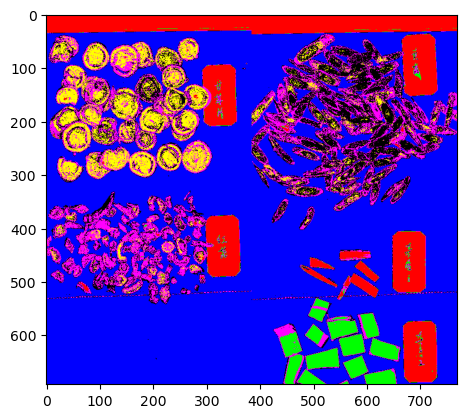

In [28]:
# 展示并保存预测结果
import matplotlib.pyplot as plt
plt.imshow(pre_pic_colored)
plt.savefig('hebing.png', dpi=300)